<a href="https://colab.research.google.com/github/G0rav/Machine_Learning_Projects_for_learning/blob/master/Machine_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from xgboost import XGBRegressor

In [232]:
train = pd.read_csv("/content/drive/My Drive/Datasets/Participants_Data_TGIH/Train.csv")
test = pd.read_csv("/content/drive/My Drive/Datasets/Participants_Data_TGIH/Test.csv")
sample_submission = pd.read_csv("/content/drive/My Drive/Datasets/Participants_Data_TGIH/Sample Submission.csv")
combined = [train, test]

In [233]:
names = ["Training","Test"]
 
def show_df(combined):
  for i,data in enumerate(combined):
    print("{} Data:".format(names[i]))
    display(data.head())
    print()
 
def show_info(combined):
  for i,data in enumerate(combined):
    print("{} Data:".format(names[i]))
    display(data.info())
    print()

In [234]:
show_info(combined)

Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


None


Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   InvoiceDate  122049 non-null  object 
 5   CustomerID   122049 non-null  float64
 6   Country      122049 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


None

In [235]:
show_df(combined)

Training Data:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35



Test Data:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [236]:
for data in combined:
  print(data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64


In [237]:
for data in combined:
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
  #data.set_index('InvoiceDate',inplace= True)
 
show_info(combined)

Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    284780 non-null  int64         
 1   StockCode    284780 non-null  int64         
 2   Description  284780 non-null  int64         
 3   Quantity     284780 non-null  int64         
 4   InvoiceDate  284780 non-null  datetime64[ns]
 5   UnitPrice    284780 non-null  float64       
 6   CustomerID   284780 non-null  float64       
 7   Country      284780 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 17.4 MB


None


Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    122049 non-null  int64         
 1   StockCode    122049 non-null  int64         
 2   Description  122049 non-null  int64         
 3   Quantity     122049 non-null  int64         
 4   InvoiceDate  122049 non-null  datetime64[ns]
 5   CustomerID   122049 non-null  float64       
 6   Country      122049 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 6.5 MB


None

In [238]:
train['month'] = train['InvoiceDate'].dt.month
train['day'] = train['InvoiceDate'].dt.day
train['hour'] = train['InvoiceDate'].dt.hour
train['minute'] = train['InvoiceDate'].dt.minute
 
test['month'] = test['InvoiceDate'].dt.month
test['day'] = test['InvoiceDate'].dt.day
test['hour'] = test['InvoiceDate'].dt.hour
test['minute'] = test['InvoiceDate'].dt.minute

In [239]:
for data in combined:
  #data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
  data.set_index('InvoiceDate',inplace= True)
 
show_info(combined)

Training Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284780 entries, 2011-05-06 16:54:00 to 2011-08-22 13:30:00
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   UnitPrice    284780 non-null  float64
 5   CustomerID   284780 non-null  float64
 6   Country      284780 non-null  int64  
 7   month        284780 non-null  int64  
 8   day          284780 non-null  int64  
 9   hour         284780 non-null  int64  
 10  minute       284780 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 26.1 MB


None


Test Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122049 entries, 2011-02-22 15:22:00 to 2011-09-12 13:50:00
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   CustomerID   122049 non-null  float64
 5   Country      122049 non-null  int64  
 6   month        122049 non-null  int64  
 7   day          122049 non-null  int64  
 8   hour         122049 non-null  int64  
 9   minute       122049 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 10.2 MB


None

In [240]:
show_df(combined)

Training Data:


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,month,day,hour,minute
InvoiceDate,,,,,,,,,,,
2011-05-06 16:54:00,6141,1583,144,3,3.75,14056.0,35,5,6,16,54
2011-05-11 07:35:00,6349,1300,3682,6,1.95,13098.0,35,5,11,7,35
2011-11-20 13:20:00,16783,2178,1939,4,5.95,15044.0,35,11,20,13,20
2011-11-22 12:07:00,16971,2115,2983,1,0.83,15525.0,35,11,22,12,7
2011-05-06 09:00:00,6080,1210,2886,12,1.65,13952.0,35,5,6,9,0



Test Data:


,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,month,day,hour,minute
InvoiceDate,,,,,,,,,,
2011-02-22 15:22:00,3139,1709,1079,3,16161.0,35,2,22,15,22
2010-12-08 12:46:00,617,510,3457,1,17341.0,35,12,8,12,46
2011-10-25 13:53:00,14653,604,694,36,15158.0,35,10,25,13,53
2011-06-27 12:38:00,8634,1478,3473,2,16033.0,35,6,27,12,38
2011-11-06 16:14:00,15546,3216,871,1,15351.0,35,11,6,16,14


In [241]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,284780.0,9955.394083,5551.519138,0.0,5069.00,10310.00,14657.00,22188.0
StockCode,284780.0,1573.386807,843.604991,0.0,939.00,1521.00,2106.00,3683.0
Description,284780.0,2023.955573,1089.812078,0.0,1141.00,1987.00,2945.00,3895.0
Quantity,284780.0,12.028468,295.111588,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,284780.0,3.451216,78.399541,0.0,1.25,1.95,3.75,38970.0
CustomerID,284780.0,15288.224278,1714.336529,12346.0,13953.00,15152.00,16794.00,18287.0
Country,284780.0,32.823846,6.743602,0.0,35.00,35.00,35.00,36.0
month,284780.0,7.612922,3.415785,1.0,5.00,8.00,11.00,12.0
day,284780.0,15.030318,8.652114,1.0,7.00,15.00,22.00,31.0
hour,284780.0,12.738064,2.288886,6.0,11.00,13.00,14.00,20.0


In [242]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,122049.0,9940.419692,5554.116349,0.0,5018.0,10311.0,14635.0,22189.0
StockCode,122049.0,1572.955788,845.106082,0.0,937.0,1523.0,2106.0,3683.0
Description,122049.0,2026.412744,1087.697388,0.0,1147.0,1987.0,2945.0,3895.0
Quantity,122049.0,12.137920,54.311646,-9360.0,2.0,5.0,12.0,4800.0
CustomerID,122049.0,15286.445256,1711.887591,12347.0,13953.0,15152.0,16782.0,18287.0
Country,122049.0,32.836795,6.726816,0.0,35.0,35.0,35.0,36.0
month,122049.0,7.589673,3.426258,1.0,5.0,8.0,11.0,12.0
day,122049.0,15.049685,8.657520,1.0,7.0,15.0,22.0,31.0
hour,122049.0,12.736090,2.275754,6.0,11.0,13.0,14.0,20.0
minute,122049.0,30.373063,17.112054,0.0,16.0,31.0,45.0,59.0


In [243]:
train.corr()['UnitPrice'].sort_values()

Country       -0.005378
CustomerID    -0.004932
month         -0.002478
day           -0.000975
Quantity      -0.000924
minute        -0.000523
Description   -0.000424
hour           0.002002
InvoiceNo      0.007927
StockCode      0.020073
UnitPrice      1.000000
Name: UnitPrice, dtype: float64

In [244]:
for name,data in zip(names,combined):
  print(f'{name} data:')
  print(data.nunique())
  print()

Training data:
InvoiceNo      20971
StockCode       3619
Description     3819
Quantity         373
UnitPrice        524
CustomerID      4339
Country           37
month             12
day               31
hour              15
minute            60
dtype: int64

Test data:
InvoiceNo      18204
StockCode       3410
Description     3563
Quantity         274
CustomerID      4226
Country           37
month             12
day               31
hour              15
minute            60
dtype: int64



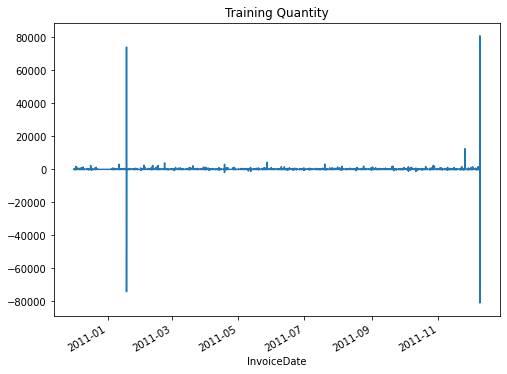

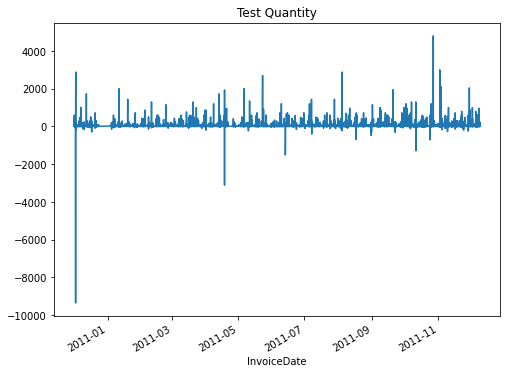

In [245]:
for name,data in zip(names,combined):
  plt.figure(figsize = (8,6))
  data["Quantity"].plot()
  plt.title("{} Quantity".format(name))
 
  plt.show()

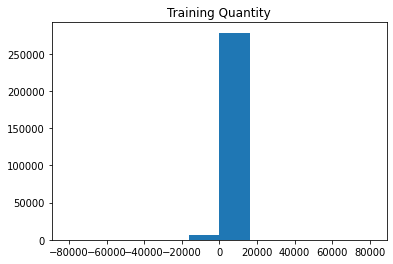

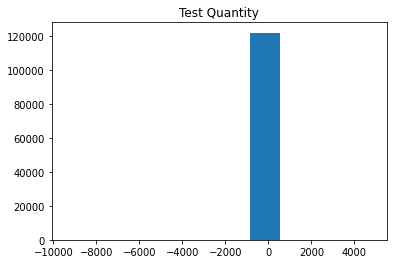

In [246]:
for name,data in zip(names,combined):
  #plt.figure(figsize = (8,6))
  plt.hist(data["Quantity"])
  plt.title("{} Quantity".format(name))
 
  plt.show()

count    284775.000000
mean         11.984644
std          42.260053
min       -1930.000000
25%           2.000000
50%           5.000000
75%          12.000000
max        4300.000000
Name: Quantity, dtype: float64

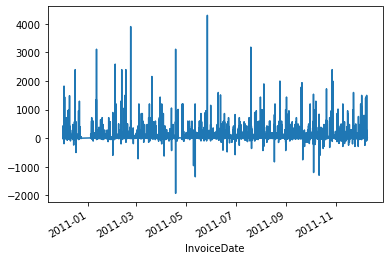

In [247]:
#extreme outliers
train.drop(train.query('Quantity<-10000 | Quantity>10000').index, inplace = True)
train["Quantity"].plot()
train['Quantity'].describe()

In [248]:
#train_quantity_lower_range = np.mean(train['Quantity']) - 3*np.std(train['Quantity'])
#train_quantity_upper_range = np.mean(train['Quantity']) + 3*np.std(train['Quantity'])
 
#train.query('Quantity>{} | Quantity<{}'.format(train_quantity_upper_range,train_quantity_lower_range))

In [249]:
#test_quantity_lower_range = np.mean(test['Quantity']) - 3*np.std(test['Quantity'])
#test_quantity_upper_range = np.mean(test['Quantity']) + 3*np.std(test['Quantity'])
 
#test.query('Quantity>{} | Quantity<{}'.format(test_quantity_upper_range,test_quantity_lower_range))

In [250]:
'''
def update_train_quantity(x):
  if (x<train_quantity_lower_range) | (x>train_quantity_upper_range):
    return np.mean(train['Quantity'])
  else:
    return x

def update_test_quantity(x):
  if (x<test_quantity_lower_range) | (x>test_quantity_upper_range):
    return np.mean(train['Quantity'])
  else:
    return x
'''

"\ndef update_train_quantity(x):\n  if (x<train_quantity_lower_range) | (x>train_quantity_upper_range):\n    return np.mean(train['Quantity'])\n  else:\n    return x\n\ndef update_test_quantity(x):\n  if (x<test_quantity_lower_range) | (x>test_quantity_upper_range):\n    return np.mean(train['Quantity'])\n  else:\n    return x\n"

In [251]:
test['Quantity'] = test['Quantity'].apply(lambda x: np.mean(train['Quantity']) if x<-2000 else x)

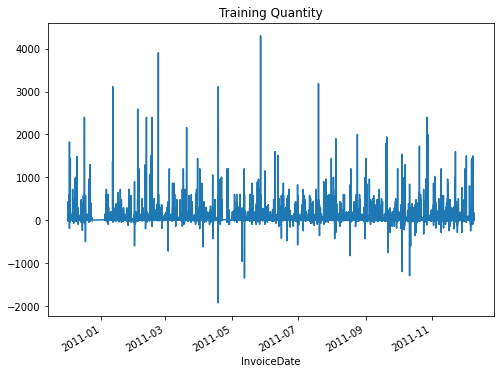

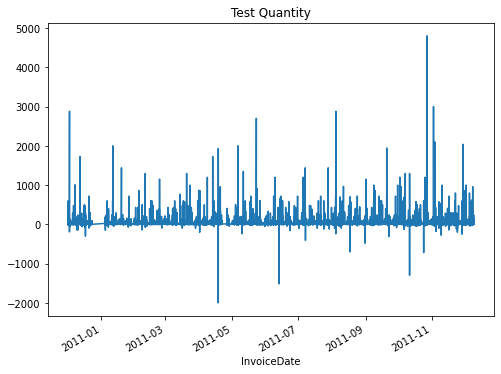

In [252]:
for name,data in zip(names,combined):
  plt.figure(figsize = (8,6))
  data["Quantity"].plot()
  plt.title("{} Quantity".format(name))
 
  plt.show()

In [253]:
test['Quantity'].describe()

count    122049.000000
mean         12.240321
std          46.367872
min       -2000.000000
25%           2.000000
50%           5.000000
75%          12.000000
max        4800.000000
Name: Quantity, dtype: float64

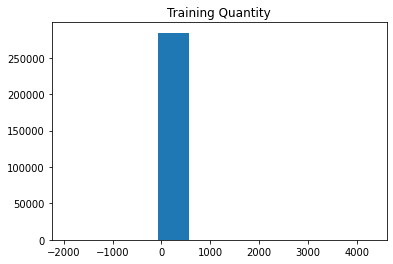

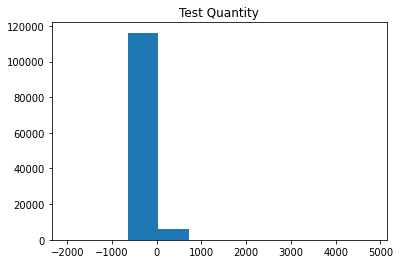

In [254]:
for name,data in zip(names,combined):
  #plt.figure(figsize = (8,6))
  plt.hist(data["Quantity"])
  plt.title("{} Quantity".format(name))
 
  plt.show()

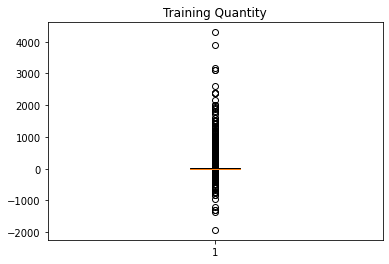

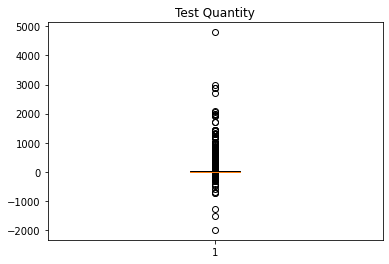

In [255]:
for name,data in zip(names,combined):
  #plt.figure(figsize = (8,6))
  plt.boxplot(data["Quantity"])
  plt.title("{} Quantity".format(name))
 
  plt.show()

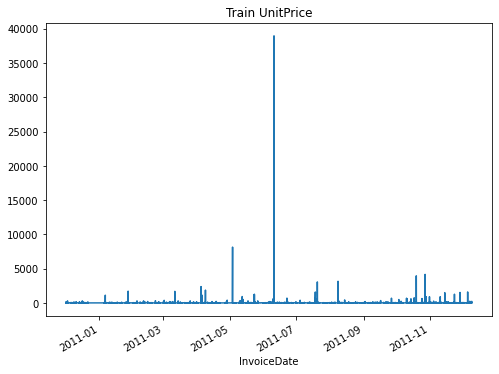

In [256]:
plt.figure(figsize = (8,6))
 
train["UnitPrice"].plot()
plt.title('Train UnitPrice')

plt.show()

In [257]:
train.query('UnitPrice>1000')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,month,day,hour,minute
InvoiceDate,,,,,,,,,,,
2011-11-14 15:27:00,16242,3680,1043,1,1500.36,14096.0,35,11,14,15,27
2011-10-19 11:18:00,14292,3681,2140,1,2118.74,12744.0,29,10,19,11,18
2011-10-27 14:13:00,14824,3681,2140,1,4161.06,12536.0,13,10,27,14,13
2011-11-23 13:39:00,17128,3680,1043,1,1270.06,14096.0,35,11,23,13,39
2011-04-04 13:03:00,4823,3681,2140,1,2382.92,12744.0,29,4,4,13,3
2011-03-11 10:22:00,3816,3681,2140,1,1687.17,14911.0,10,3,11,10,22
2011-04-08 14:17:00,19659,3679,1066,-1,1867.86,17940.0,35,4,8,14,17
2011-03-11 10:19:00,3815,3681,2140,1,1687.17,14911.0,10,3,11,10,19
2011-04-04 13:08:00,19618,3681,2140,-1,2382.92,12744.0,29,4,4,13,8


In [258]:
train.drop(train.query('UnitPrice>500').index, inplace = True)

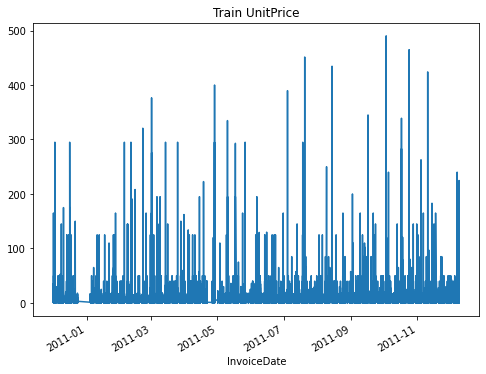

In [259]:
plt.figure(figsize = (8,6))
 
train["UnitPrice"].plot()
plt.title("Train UnitPrice")
 
plt.show()

In [260]:
train.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,month,day,hour,minute
count,281646.000000,281646.000000,281646.000000,281646.000000,281646.000000,281646.000000,281646.000000,281646.000000,281646.000000,281646.000000,281646.000000
mean,9890.131399,1573.279251,2024.099966,12.080644,3.004050,15301.440933,32.800942,7.580693,14.989558,12.715441,30.446372
std,5544.043434,843.008604,1089.730555,42.479457,5.775049,1718.856459,6.775855,3.419141,8.644575,2.284535,17.095034
min,0.000000,0.000000,0.000000,-1930.000000,0.000000,12347.000000,0.000000,1.000000,1.000000,6.000000,0.000000
25%,5009.000000,942.000000,1143.000000,2.000000,1.250000,13919.000000,35.000000,5.000000,7.000000,11.000000,16.000000
50%,10202.000000,1522.000000,1986.000000,5.000000,1.950000,15192.000000,35.000000,8.000000,15.000000,13.000000,31.000000
75%,14590.750000,2106.000000,2945.000000,12.000000,3.750000,16810.000000,35.000000,11.000000,22.000000,14.000000,45.000000
max,22188.000000,3683.000000,3895.000000,4300.000000,490.250000,18287.000000,36.000000,12.000000,31.000000,20.000000,59.000000


In [261]:
test.describe()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,month,day,hour,minute
count,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000
mean,9940.419692,1572.955788,2026.412744,12.240321,15286.445256,32.836795,7.589673,15.049685,12.736090,30.373063
std,5554.116349,845.106082,1087.697388,46.367872,1711.887591,6.726816,3.426258,8.657520,2.275754,17.112054
min,0.000000,0.000000,0.000000,-2000.000000,12347.000000,0.000000,1.000000,1.000000,6.000000,0.000000
25%,5018.000000,937.000000,1147.000000,2.000000,13953.000000,35.000000,5.000000,7.000000,11.000000,16.000000
50%,10311.000000,1523.000000,1987.000000,5.000000,15152.000000,35.000000,8.000000,15.000000,13.000000,31.000000
75%,14635.000000,2106.000000,2945.000000,12.000000,16782.000000,35.000000,11.000000,22.000000,14.000000,45.000000
max,22189.000000,3683.000000,3895.000000,4800.000000,18287.000000,36.000000,12.000000,31.000000,20.000000,59.000000


In [263]:
for df in combined:
  df.reset_index(inplace= True)
  print(df.head())

          InvoiceDate  InvoiceNo  StockCode  ...  day  hour  minute
0 2011-05-06 16:54:00       6141       1583  ...    6    16      54
1 2011-05-11 07:35:00       6349       1300  ...   11     7      35
2 2011-11-20 13:20:00      16783       2178  ...   20    13      20
3 2011-11-22 12:07:00      16971       2115  ...   22    12       7
4 2011-05-06 09:00:00       6080       1210  ...    6     9       0

[5 rows x 12 columns]
          InvoiceDate  InvoiceNo  StockCode  ...  day  hour  minute
0 2011-02-22 15:22:00       3139       1709  ...   22    15      22
1 2010-12-08 12:46:00        617        510  ...    8    12      46
2 2011-10-25 13:53:00      14653        604  ...   25    13      53
3 2011-06-27 12:38:00       8634       1478  ...   27    12      38
4 2011-11-06 16:14:00      15546       3216  ...    6    16      14

[5 rows x 11 columns]


In [275]:
train.drop('InvoiceDate', axis=1, inplace = True)
test.drop('InvoiceDate', axis=1, inplace = True)

In [354]:
train.drop_duplicates(inplace= True)

In [359]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('UnitPrice', axis=1), 
                                                    train['UnitPrice'], test_size = .25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(209268, 10)
(69757, 10)
(209268,)
(69757,)


In [360]:
scaler = StandardScaler()
feature_scale = scaler.fit(X_train)

scaled_X_train = feature_scale.transform(X_train)
scaled_X_test = feature_scale.transform(X_test)

In [361]:
dt = DecisionTreeRegressor()
dt.fit(scaled_X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [362]:
dt.score(scaled_X_train, y_train)

0.9980626363663119

In [364]:
MSE(y_train, dt.predict(scaled_X_train))**.5

0.25719216595106353

In [368]:
MSE(y_test, dt.predict(scaled_X_test))**.5

4.377778826410589

In [366]:
rf = RandomForestRegressor()
rf.fit(scaled_X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [369]:
rf.score(scaled_X_train, y_train)

0.9504957592335558

In [370]:
MSE(y_train, rf.predict(scaled_X_train))**.5

1.3000898459382295

In [371]:
MSE(y_test, rf.predict(scaled_X_test))**.5

3.480559847215323

In [372]:
xgb = XGBRegressor()
xgb.fit(scaled_X_train, y_train)

[19:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [373]:
xgb.score(scaled_X_train, y_train)

0.4490783333937286

In [376]:
MSE(y_train, xgb.predict(scaled_X_train))**.5

4.3370765795095965

In [377]:
MSE(y_test, xgb.predict(scaled_X_test))**.5

4.558020337117375

In [402]:
valuation_prediction = dt.predict(scaled_X_test)*.2  + rf.predict(scaled_X_test)*.6   + xgb.predict(scaled_X_test)*.2

print(np.sqrt(MSE(y_test, valuation_prediction)))

2.6317919876746383


In [405]:
valuation_prediction = dt.predict(scaled_X_test)*.1  + rf.predict(scaled_X_test)*.8   + xgb.predict(scaled_X_test)*.1

print(np.sqrt(MSE(y_test, valuation_prediction)))

2.4339425840571067


# Full dataset train


In [378]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,month,day,hour,minute
0,6141,1583,144,3,3.75,14056.0,35,5,6,16,54
1,6349,1300,3682,6,1.95,13098.0,35,5,11,7,35
2,16783,2178,1939,4,5.95,15044.0,35,11,20,13,20
3,16971,2115,2983,1,0.83,15525.0,35,11,22,12,7
4,6080,1210,2886,12,1.65,13952.0,35,5,6,9,0


In [379]:
train_feature = train.drop('UnitPrice', axis=1)
train_label = train['UnitPrice']

In [380]:
print(train_feature.shape)
print(test.shape)

(279025, 10)
(122049, 10)


In [381]:
full_scaler = scaler.fit(train_feature)
scaled_feature = full_scaler.transform(train_feature)
scaled_test = full_scaler.transform(test)

In [383]:
dt = DecisionTreeRegressor()
dt.fit(scaled_feature, train_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [384]:
dt_pred = dt.predict(scaled_test)

In [385]:
rf = RandomForestRegressor()
rf.fit(scaled_feature, train_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [386]:
rf_pred = rf.predict(scaled_test)

In [387]:
xgb = XGBRegressor()
xgb.fit(scaled_feature, train_label)

[19:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [388]:
xgb_pred = xgb.predict(scaled_test)

In [394]:
xgb_pred.reshape(-1,1)

array([[3.4718819],
       [2.966237 ],
       [1.2716379],
       ...,
       [1.9656687],
       [6.163797 ],
       [3.0234714]], dtype=float32)

In [408]:
dt_df = pd.DataFrame(dt_pred, columns=['dt_pred'])
rf_df = pd.DataFrame(rf_pred, columns=['rf_pred'])
xgb_df = pd.DataFrame(xgb_pred, columns=['xgb_pred'])

df = pd.concat([dt_df, rf_df, xgb_df], axis=1)
df['UnitPrice'] = df['dt_pred']*.1 + df['rf_pred']*.8 + df['xgb_pred']*.1
df

,dt_pred,rf_pred,xgb_pred,UnitPrice
0,1.65,1.6500,3.471882,1.832188
1,1.25,1.2540,2.966237,1.424824
2,3.39,3.5718,1.271638,3.323604
3,1.65,1.6500,4.282385,1.913238
4,12.75,12.7500,4.114094,11.886409
...,...,...,...,...
122044,0.38,0.3986,1.583231,0.515203
122045,1.69,1.6900,1.262686,1.647269
122046,1.25,1.2570,1.965669,1.327167
122047,3.95,3.9500,6.163797,4.171380


In [420]:
df = pd.DataFrame(df['UnitPrice'])

In [421]:
df.to_csv('my_submission_file.csv', index= False)
df.to_csv('/content/drive/My Drive/Datasets/Participants_Data_TGIH/my_submission_file.csv', index=False)

In [306]:
df.describe()

,UnitPrice
count,122049.000000
mean,1.696895
std,2.322709
min,-0.102298
25%,1.129377
50%,1.373210
75%,1.799992
max,172.308609


In [ ]:
pred = model.predict(scaled_X_test)
len(pred)

In [ ]:
#import graphviz
#from sklearn import tree
# DOT data
#dot_data = tree.export_graphviz(model, out_file=None, 
                                filled=True)

In [ ]:
# Draw graph
#graph = graphviz.Source(dot_data, format="png") 
#graph

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

In [ ]:
show_df(combined)

In [ ]:
test_dataset.shape

In [ ]:
train_dataset.shape

In [ ]:
train_dataset